<h2 align=center> Facial Expression Recognition with Keras</h2>

### Task 1: Import Libraries

In [3]:
import sys

print(sys.version)

3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline


import keras
#https://github.com/stared/livelossplot/issues/104#issuecomment-629851191

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D
#from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
#from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
#from tensorflow.keras.models import Model, Sequential
#from tensorflow.keras.optimizers import Adam
#from livelossplot.keras import PlotLossesCallback
#from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
#from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model
from livelossplot.keras import PlotLossesCallback


from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras

#from livelossplot import PlotLossesTensorFlowKeras
#https://stackoverflow.com/questions/62307919/cannot-import-name-plotlossestensorflowkeras-in-jupyter-notebook-even-though-i

import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0-rc1


### Task 2: Plot Sample Image

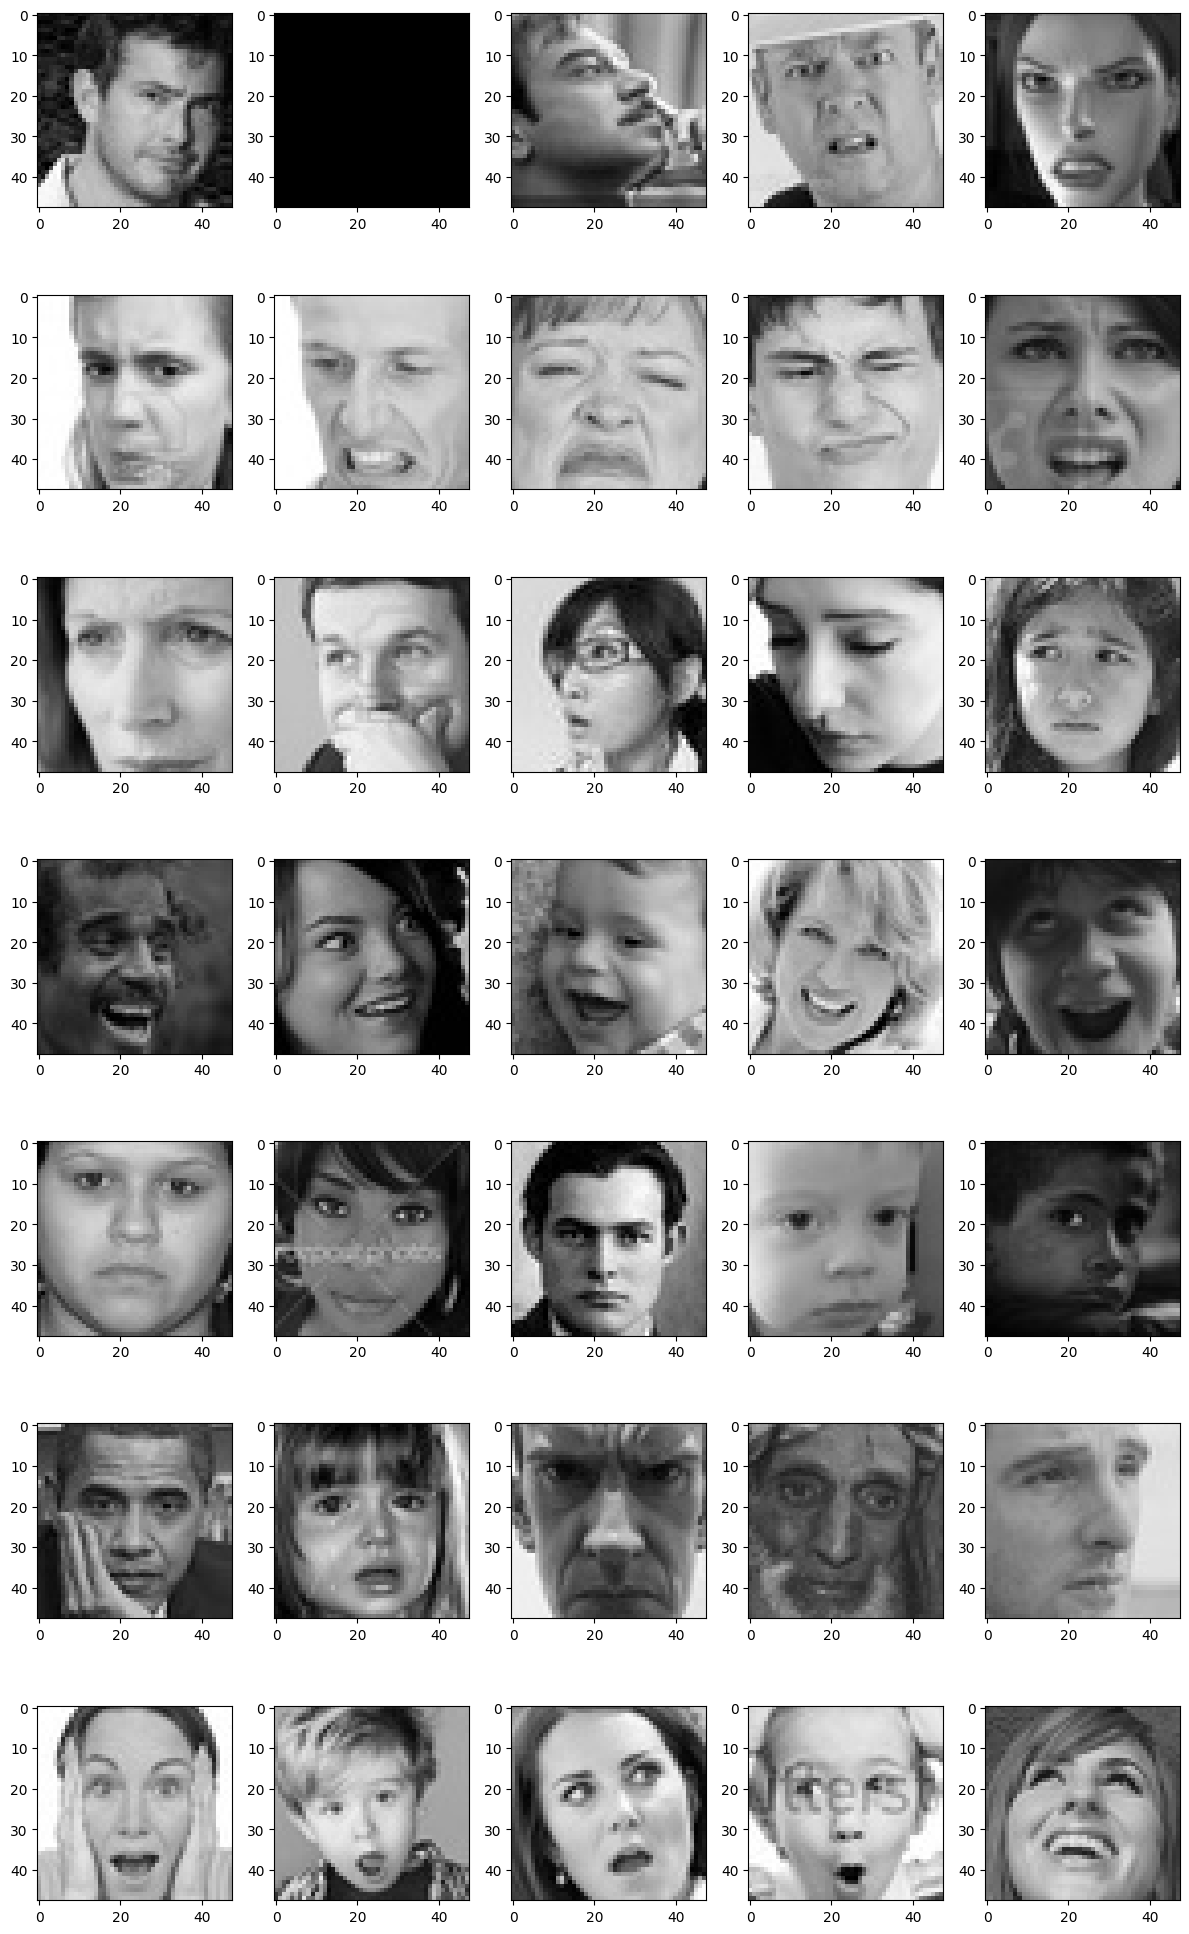

In [5]:
#plot_example_images(plt).show()
utils.datasets.fer.plot_example_images(plt).show()

In [6]:
#no.of each type of datasets -check for class  balance for training set
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression)))+ " " + expression + " images")

3995 angry images
436 disgust images
4097 fear images
7215 happy images
4965 neutral images
4830 sad images
3171 surprise images


### Task 3: Generate Training and Validation Batches

In [7]:
#during training we will try to minimize the loss of neural network using minibatch gradient descent
#mini batch -one step of gradient descent
#epoch : picking a minibatch -> feeding it to the neural network -> calculate the mean gradient of the minibatch -> use the min gradient to update the weights -> repeat process till you come to local optimal and converge 


#creating two directories for training and validation batches
#defining task for data loader
img_size = 48 #generally we will define a ht. and width parameter but here we know the data contains 48x48 images
batch_size = 64  #batch_size is chosen on a convenient manner to speed up the process, can be experimented 
#data generator object - one for training and another for validation 
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("train/", target_size=(img_size,img_size),
                                                     color_mode='grayscale', batch_size = batch_size, class_mode='categorical',
                                                     shuffle=True) #takes in batches of images  from 'train' directory

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("test/", target_size=(img_size,img_size),
                                                     color_mode='grayscale', batch_size = batch_size, class_mode='categorical',
                                                     shuffle=True) #takes in batches of images  from 'test' directory



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Task 4: Create CNN Model

![](model.png)
Inspired by Goodfellow, I.J., et.al. (2013). Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

In [8]:
model = Sequential()

#1 - conv
model.add(Conv2D(64, (3,3), padding='same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2 - conv layer 
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3 - conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4 - conv
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#second fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
#activation function softmax who output can be interpreted as probability scores
opt = Adam(lr=0.0005)#Adam- optimiser
#0.0005- specifically chosen, can be reduced with other hyperparameter
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

c:\Users\VICTUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


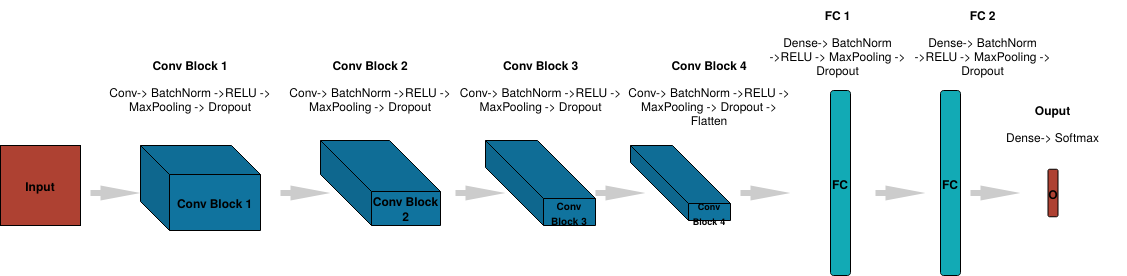

In [9]:

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

### Task 6: Train and Evaluate Model

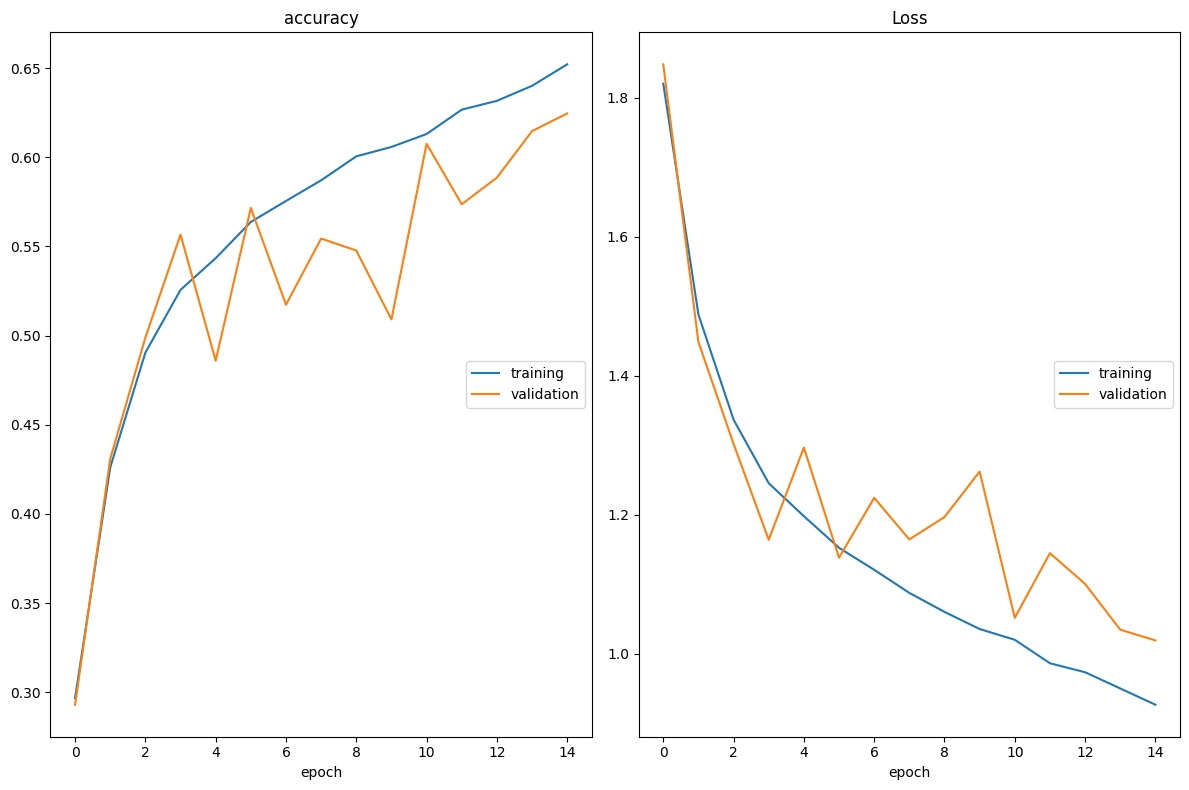

accuracy
	training         	 (min:    0.297, max:    0.652, cur:    0.652)
	validation       	 (min:    0.293, max:    0.625, cur:    0.625)
Loss
	training         	 (min:    0.927, max:    1.820, cur:    0.927)
	validation       	 (min:    1.019, max:    1.848, cur:    1.019)
448/448 [==============================] - 396s 883ms/step - loss: 0.9267 - accuracy: 0.6521 - val_loss: 1.0192 - val_accuracy: 0.6246


In [10]:

epochs = 15 
#set according to learning rate and batch size    \
#for training
steps_per_epoch = train_generator.n//train_generator.batch_size
#for validation
validation_steps = validation_generator.n//validation_generator.batch_size

#call-backs
#checkpoint call back to check the model's rate with highest accuracy 
checkpoint = ModelCheckpoint("model_weights.h5", monitor = "val_accuracy",
                                    save_weights_only= True, mode = 'max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience =2, min_lr = 0.00001, model='auto') #reduce the learning rate when we observed a plateau ; so if we dont see a improvement in validation loss after a certain number of epoch we can reduce the learning rate
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]


import keras
from livelossplot.inputs.tf_keras import PlotLossesCallback
#https://stackoverflow.com/questions/62162343/keras-keyerror-metrics-line-13-callbacks-callbacks-while-executing-model


history = model.fit(
    x=train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=validation_steps,
    callbacks=[PlotLossesCallback()]
)

### Task 7: Represent Model as JSON String

In [9]:
#create a class for a new model that takes the trained weight and architecture and makes prediction to a web intreface using a microwave framework - flask 
model_json = model.to_json()
with open('model.json',"w") as json_file:
    json_file.write(model_json)
#print(os.getcwd())

In [10]:
model.save('model_weights.h5')